[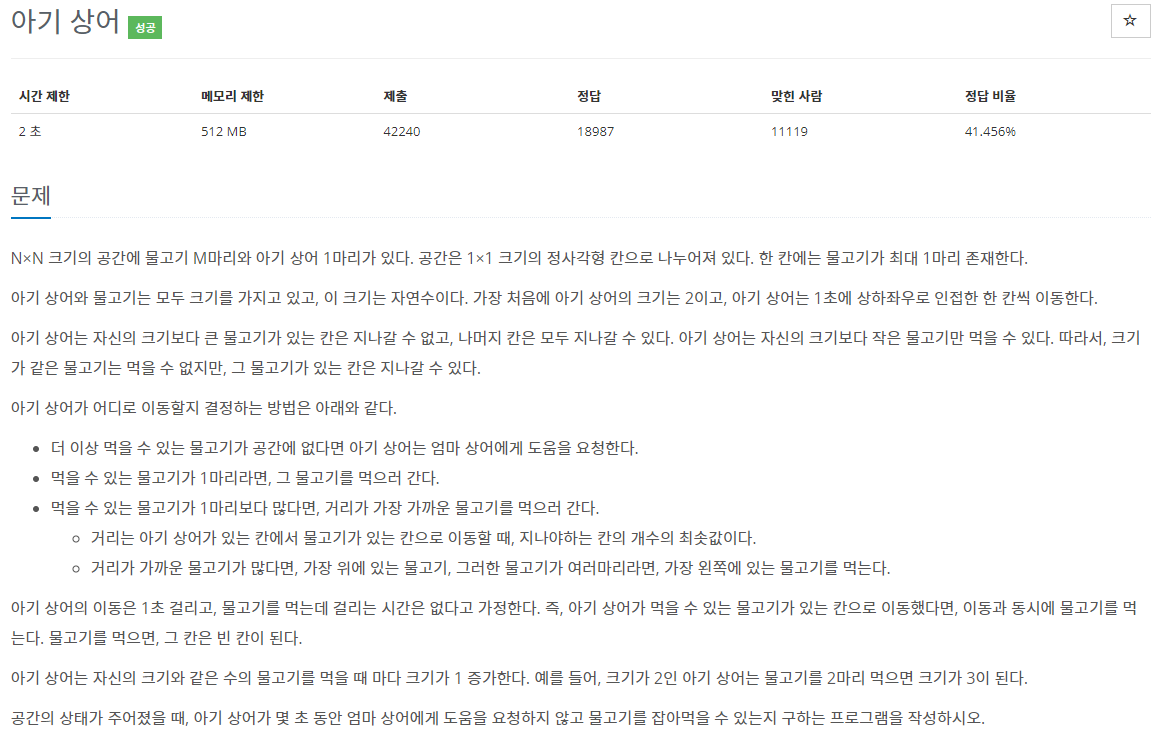](https://www.acmicpc.net/problem/16236)

In [ ]:
from collections import deque
import sys
input = sys.stdin.readline


def bfs(i, j):    # 내가 현재 먹을 수 있는 물고기를 모두 조사 후 하나 리턴 (맨 위, 맨 아래)
    visited = [[0] * n for _ in range(n)]   # 물고기로 이동하는 루트
    dist = [[0] * n for _ in range(n)]  # 그 물고기로 가기 위한 시간
    visited[i][j] = 1
    eat = []    # 물고기 담을 통
    q = deque([(i, j)])
    while q:
        ii, jj = q.popleft()
        for di, dj in [[1, 0], [-1, 0], [0, -1], [0, 1]]:
            ni, nj = ii + di, jj + dj
            if 0 <= ni < n and 0 <= nj < n and not visited[ni][nj]:
                if arr[ni][nj] <= arr[i][j] or not arr[ni][nj]:     # 갈 수 있는 곳
                    q.append((ni, nj))
                    visited[ni][nj] = 1
                    dist[ni][nj] = dist[ii][jj] + 1
                if arr[ni][nj] < arr[i][j] and arr[ni][nj]:     # 식사할 수 있는 곳
                    eat.append((ni, nj, dist[ni][nj]))
    if not eat:
        return -1, -1, -1
    eat.sort(key=lambda x: (x[2], x[0], x[1]))      # 거리, 맨 위, 맨 왼쪽
    return eat[0][0], eat[0][1], eat[0][2]


n = int(input())
arr = [list(map(int, input().split())) for _ in range(n)]
for i in range(n):
    for j in range(n):
        if arr[i][j] == 9:
            arr[i][j] = 2
            (x, y) = (i, j)
            break

exp = cnt = 0
while True:
    px, py, dist = bfs(x, y)
    if px == -1: break
    arr[px][py] = arr[x][y]     # 상어의 현재 레벨
    arr[x][y] = 0
    (x, y) = (px, py)
    exp += 1
    if exp == arr[x][y]:
        exp = 0
        arr[px][py] += 1
    cnt += dist

print(cnt)

---

dfs 함수 : 현재 내가 먹을 수 있는 물고기 목록을 조사하여 맨 위, 맨 왼쪽 물고기 return
<br><br>
맨 밑에 while True 문에서 bfs 한 번 돌면 그 결과는 내가 먹은 물고기위치에 서있단 거임.<br>
그 때 내가 먹은 양과 레벨을 비교하여 성장시킬 수 있고 cnt += dist 에서 거리를 추가할 수 있음